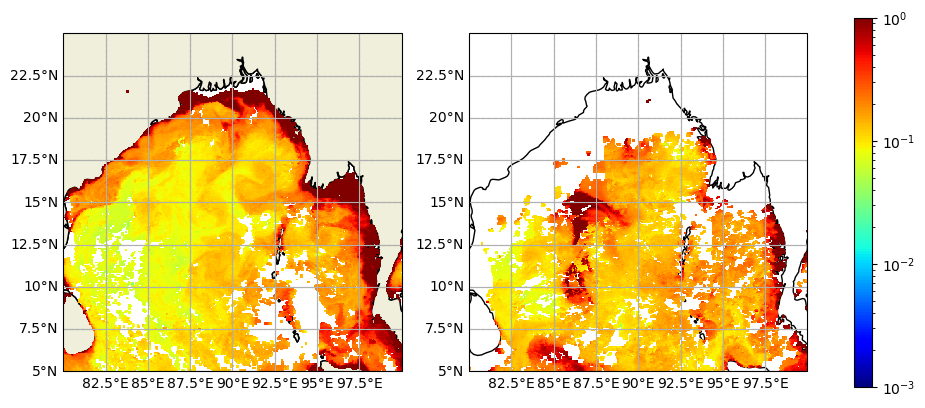

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.colors

# Load the data files as xarray datasets
data1 = xr.open_dataset('AQUA_MODIS.20200508_20200515.L3m.8D.CHL.chlor_a.4km.nc')
data2 = xr.open_dataset('AQUA_MODIS.20200524_20200531.L3m.8D.CHL.chlor_a.4km.nc')

# Slice the data for the region you want to plot
data1 = data1.sel(lat=slice(25, 5), lon=slice(80, 100))
data2 = data2.sel(lat=slice(25, 5), lon=slice(80, 100))

# Create the figure and axes using cartopy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and gridlines to the maps
ax1.coastlines()
ax1.gridlines(linestyle='--', color='black', alpha=0.5)
ax2.coastlines()
ax2.gridlines(linestyle='--', color='black', alpha=0.5)
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.LAKES,facecolor='white',edgecolor='k')
#ax.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())                                                                   # add the coastlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.right_labels = False
gl.top_labels = False
N = 128
cmap = plt.get_cmap('jet',N)
norm = mpl.colors.LogNorm(vmin=0.001,vmax=1)

# Create the contour plots for each subplot
c1 = ax1.pcolor(data1.lon, data1.lat, data1.chlor_a.values, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
c2 = ax2.pcolor(data2.lon, data2.lat, data2.chlor_a.values, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

# Add a colorbar for the plots
cb = fig.colorbar(c1, ax=[ax1, ax2], shrink=0.8)

# Set titles for the subplots

# Show the plots
plt.show()

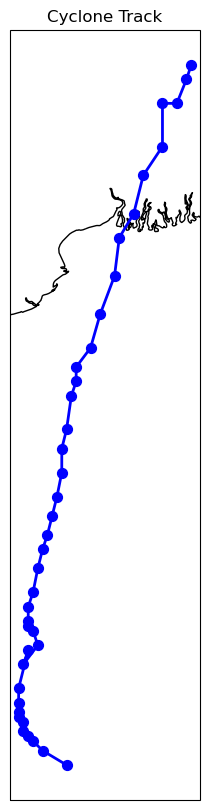

In [3]:
import pandas as pd
# Load cyclone track data from CSV file
data = pd.read_csv('cyclone_Trcak.csv')

# Create a new figure and axes with a Plate Carree projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add coastlines, land, and ocean features
ax.coastlines(resolution='10m', linewidth=1)


# Plot the cyclone track as circular points connected by lines
ax.scatter(data['lon'], data['lat'], s=50, color='b', marker='o', transform=ccrs.PlateCarree())
ax.plot(data['lon'], data['lat'], c='b', linewidth=2, transform=ccrs.PlateCarree())

# Set the title of the plot
plt.title('Cyclone Track')

# Show the plot
plt.show()

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
# Define the color map
color_values = [
    [147,0,108], [111,0,144], [72,0,183], [33,0,222], [0,10,255], [0,74,255],
    [0,144,255], [0,213,255], [0,255,215], [0,255,119], [0,255,15], [96,255,0],
    [200,255,0], [255,235,0], [255,183,0], [255,131,0], [255,79,0], [255,31,0],
    [230,0,0], [165,0,0], [105,0,0]
]
sample_values = [0.0105927390978, 0.01511153517746066, 0.02218493234759939,
                 0.03259381777070279, 0.047886418593687446, 0.06831451603621097,
                 0.10029112852033921, 0.1473464383750438, 0.2164794954661175,
                 0.30882852380362497, 0.4533847704508146, 0.6661070836975002,
                 0.9786359751581525, 1.3961169989723918, 2.049610500045872,
                 3.011261431529367, 4.424106633340013, 6.311407543621453,
                 9.265646919990738, 13.612969492356, 20.0]
cmap = colors.ListedColormap(np.array(color_values)/255.0)
norm = colors.BoundaryNorm(sample_values, len(sample_values))

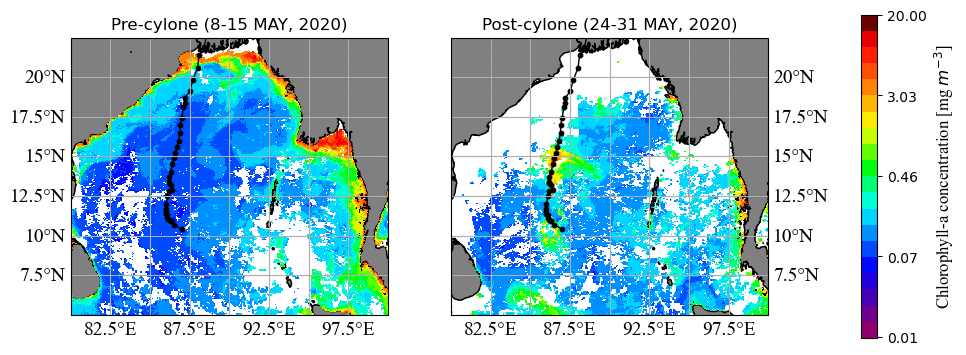

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd

# Define the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax1.set_extent([80, 100, 5, 22.5], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='10m', linewidth=1)

ax1.gridlines(linestyle='--', color='black', alpha=0.5)
ax1.add_feature(cfeature.LAND, color='grey')
#ax.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())                                                                   # add the coastlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False 

ax2.set_extent([80, 100, 5, 22.5], crs=ccrs.PlateCarree())
ax2.coastlines(resolution='10m', linewidth=1)

ax2.gridlines(linestyle='--', color='black', alpha=0.5)
ax2.add_feature(cfeature.LAND, color='grey')
#ax.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())                                                                   # add the coastlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.left_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False 
# remove longitude labels on the top

# Generate a sample plot with the defined color map
im1 = ax1.pcolormesh(data1.lon, data1.lat, data1.chlor_a.values, cmap=cmap, norm=norm)
im2 = ax2.pcolormesh(data2.lon, data2.lat, data2.chlor_a.values, cmap=cmap, norm=norm)
# Create the color bar
cbar = fig.colorbar(im1, ax=[ax1, ax2], shrink=0.7, pad=0.1)

ax1.scatter(data['lon'], data['lat'], s=10, color='black', marker='o', transform=ccrs.PlateCarree())
ax1.plot(data['lon'], data['lat'], c='black', linewidth=1, transform=ccrs.PlateCarree())
ax2.scatter(data['lon'], data['lat'], s=10, color='black', marker='o', transform=ccrs.PlateCarree())
ax2.plot(data['lon'], data['lat'], c='black', linewidth=1, transform=ccrs.PlateCarree())
# Set the tick locations and labels
tick_locs = [0.011, 0.07, 0.46, 3.03, 20]
tick_labels = [f"{loc:.2f}" for loc in tick_locs]
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)

cbar.ax.set_ylabel('Chlorophyll-a concentration [mg $m^{-3}$]', fontsize = 12, family= 'times new roman')

ax1.set_title ('Pre-cylone (8-15 MAY, 2020)')
ax2.set_title ('Post-cylone (24-31 MAY, 2020)')

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
# Show the plot
plt.show()
#plt.savefig('visualizations/chl.jpg', dpi=300)

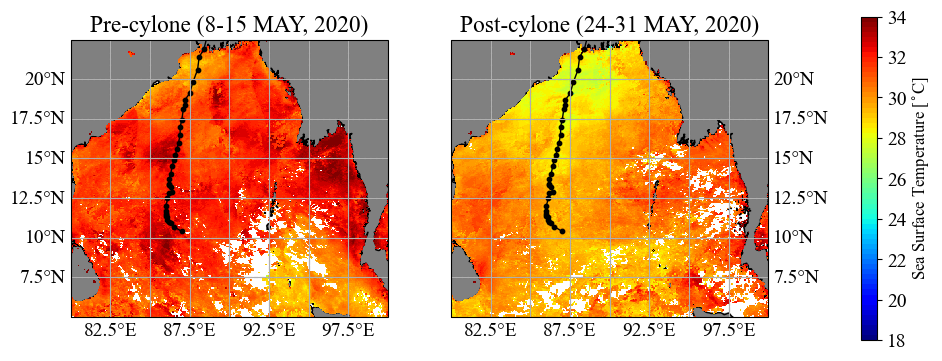

In [7]:
data3 = xr.open_dataset('AQUA_MODIS.20200508_20200515.L3m.8D.SST.sst.4km.nc')
data4 = xr.open_dataset('AQUA_MODIS.20200524_20200531.L3m.8D.SST.sst.4km.nc')

# Define the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax1.set_extent([80, 100, 5, 22.5], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='10m', linewidth=1)

ax1.gridlines(linestyle='--', color='black', alpha=0.5)
ax1.add_feature(cfeature.LAND, color='grey')
#ax.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())                                                                   # add the coastlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False 

ax2.set_extent([80, 100, 5, 22.5], crs=ccrs.PlateCarree())
ax2.coastlines(resolution='10m', linewidth=1)

ax2.gridlines(linestyle='--', color='black', alpha=0.5)
ax2.add_feature(cfeature.LAND, color='grey')
#ax.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())                                                                   # add the coastlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.left_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False 
# remove longitude labels on the top
N = 64
cmap = plt.get_cmap('jet',N)
norm = mpl.colors.Normalize(vmin=18,vmax=34)
# Generate a sample plot with the defined color map
im1 = ax1.pcolormesh(data3.lon, data3.lat, data3.sst, cmap=cmap, norm=norm)
im2 = ax2.pcolormesh(data3.lon, data3.lat, data4.sst, cmap=cmap, norm=norm)
# Create the color bar
cbar = fig.colorbar(im1, ax=[ax1, ax2], shrink=0.7, pad=0.1)

ax1.scatter(data['lon'], data['lat'], s=10, color='black', marker='o', transform=ccrs.PlateCarree())
ax1.plot(data['lon'], data['lat'], c='black', linewidth=1, transform=ccrs.PlateCarree())
ax2.scatter(data['lon'], data['lat'], s=10, color='black', marker='o', transform=ccrs.PlateCarree())
ax2.plot(data['lon'], data['lat'], c='black', linewidth=1, transform=ccrs.PlateCarree())
# Set the tick locations and labels
# tick_locs = [0.011, 0.07, 0.46, 3.03, 20]
# tick_labels = [f"{loc:.2f}" for loc in tick_locs]
# cbar.set_ticks(tick_locs)
# cbar.set_ticklabels(tick_labels)

cbar.ax.set_ylabel('Sea Surface Temperature [$^{\circ}$C]', fontsize = 12, family= 'times new roman')

ax1.set_title ('Pre-cylone (8-15 MAY, 2020)')
ax2.set_title ('Post-cylone (24-31 MAY, 2020)')

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
# Show the plot
plt.show()
#plt.savefig('visualizations/chl.jpg', dpi=300)

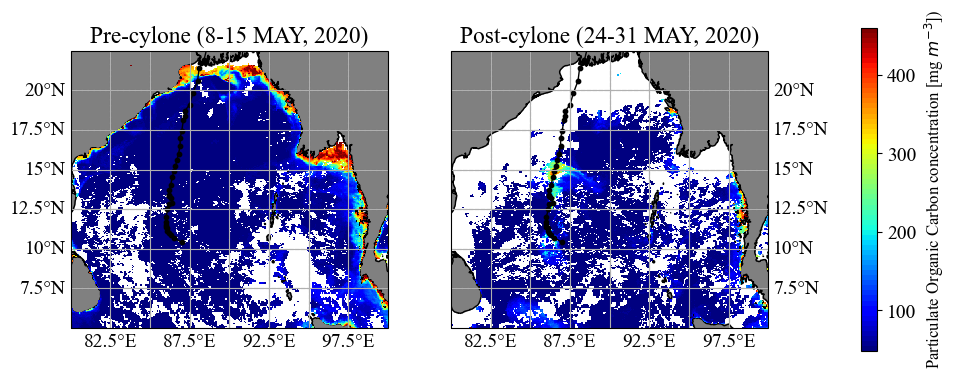

In [8]:
data5 = xr.open_dataset('AQUA_MODIS.20200508_20200515.L3m.8D.POC.poc.4km.nc')
data6 = xr.open_dataset('AQUA_MODIS.20200524_20200531.L3m.8D.POC.poc.4km.nc')

# Define the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax1.set_extent([80, 100, 5, 22.5], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='10m', linewidth=1)

ax1.gridlines(linestyle='--', color='black', alpha=0.5)
ax1.add_feature(cfeature.LAND, color='grey')
#ax.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())                                                                   # add the coastlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False 

ax2.set_extent([80, 100, 5, 22.5], crs=ccrs.PlateCarree())
ax2.coastlines(resolution='10m', linewidth=1)

ax2.gridlines(linestyle='--', color='black', alpha=0.5)
ax2.add_feature(cfeature.LAND, color='grey')
#ax.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())                                                                   # add the coastlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.left_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False 
# remove longitude labels on the top
N = 64
cmap = plt.get_cmap('jet',N)
norm = mpl.colors.Normalize(vmin=48,vmax=460)
# Generate a sample plot with the defined color map
im1 = ax1.pcolormesh(data5.lon, data5.lat, data5.poc, cmap=cmap, norm=norm)
im2 = ax2.pcolormesh(data6.lon, data6.lat, data6.poc, cmap=cmap, norm=norm)
# Create the color bar
cbar = fig.colorbar(im1, ax=[ax1, ax2], shrink=0.7, pad=0.1)

ax1.scatter(data['lon'], data['lat'], s=10, color='black', marker='o', transform=ccrs.PlateCarree())
ax1.plot(data['lon'], data['lat'], c='black', linewidth=1, transform=ccrs.PlateCarree())
ax2.scatter(data['lon'], data['lat'], s=10, color='black', marker='o', transform=ccrs.PlateCarree())
ax2.plot(data['lon'], data['lat'], c='black', linewidth=1, transform=ccrs.PlateCarree())
# Set the tick locations and labels
# tick_locs = [48, 84, 149, 263, 460]
# tick_labels = [f"{loc:.2f}" for loc in tick_locs]
# cbar.set_ticks(tick_locs)
# cbar.set_ticklabels(tick_labels)

cbar.ax.set_ylabel('Particulate Organic Carbon concentration [mg $m^{-3}$])', fontsize = 12, family= 'times new roman')

ax1.set_title ('Pre-cylone (8-15 MAY, 2020)')
ax2.set_title ('Post-cylone (24-31 MAY, 2020)')

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
# Show the plot
plt.show()
#plt.savefig('visualizations/chl.jpg', dpi=300)